In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras import models
from tensorflow.keras import layers

import matplotlib.pyplot as plt

import random
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [24]:
NUM_FEATURES = 2
NUM_ITER = 2000
learning_rate = 0.1

W: [0.5706535  0.53257656]
b: -0.12361646
plot_y: [ 4.7109623 -4.236027 ]


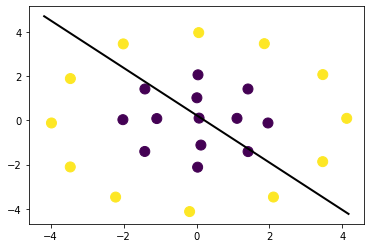

In [25]:
x = np.array([[-3.98,-0.12],
[-3.464,-2.11],
[-3.461,1.89],
[-2.22,-3.474],
[-2.02,0.03],
[-2.01,3.459],
[-1.42,-1.409],
[-1.416,1.419],
[-1.09,0.08],
[-0.19,-4.13],
[0.01,1.02],
[0.03,-2.12],
[0.04,2.06],
[0.06,3.97],
[0.07,0.1],
[0.12,-1.12],
[1.11,0.09],
[1.411,1.419],
[1.414,-1.415],
[1.86,3.47],
[1.96,-0.12],
[2.11,-3.472],
[3.461,-1.87],
[3.464,2.07],
[4.12,0.09]], np.float32) # 4x2, input
y = np.array([1,
1,
1,
1,
0,
1,
0,
0,
0,
1,
0,
0,
0,
1,
0,
0,
0,
0,
0,
1,
0,
1,
1,
1,
1], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
y = np.reshape(y, [25,1]) # convert to 4x1
 
X = tf.placeholder(tf.float32, shape=[25, 2])
Y = tf.placeholder(tf.float32, shape=[25, 1])
 
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) # 4x1
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for k in range(NUM_ITER):
 sess.run([step], feed_dict={X: x, Y: y})
 
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
#plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

In [26]:
import pandas as pd
# reading csv files
data =  pd.read_csv('iris.data', sep=",")
print(data)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Import Keras modules
#
from keras import models
from keras import layers
from keras.utils import to_categorical
#
# Create the network
#
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))
#
# Compile the network
#
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#
# Load the iris dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
#
# Fit the neural network
#
network.fit(X_train, train_labels, epochs=20, batch_size=40)

ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\Users\pjatthi\Anaconda3\lib\site-packages\keras\utils\__init__.py)

In [ ]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = network.evaluate(X_test, test_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

W: [2.6895785 2.6895785]
b: -4.26431
plot_y: [1.7854937  0.38549364]


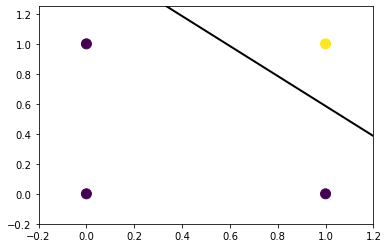

In [14]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
y = np.reshape(y, [4,1]) # convert to 4x1
 
X = tf.placeholder(tf.float32, shape=[4, 2])
Y = tf.placeholder(tf.float32, shape=[4, 1])
 
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) # 4x1
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for k in range(NUM_ITER):
 sess.run([step], feed_dict={X: x, Y: y})
 
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()